In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from afc.rctuning.optimizer import RcTuning
from afc.rctuning.defaultConfig import TUNING_MODES
from afc.rctuning.utility import plot_standard1

### Load Dataset

In [3]:
inputs = pd.read_csv('example_rctuning_withlowe.csv', index_col=0)
inputs.index = pd.to_datetime(inputs.index)

### Test on Dataset

In [4]:
# initialize tuner
rctuner = RcTuning(rctype='R4C2',
                   lhs_samples=5,
                   horizon=7*24*60*60,
                   resample='15min')

# run tuner
res = rctuner.do_tuning(inputs=inputs)

# result
print('The tuner reached optimality?', res['optimal'])
res['res_lhs']

The tuner reached optimality? True


,Rw2i,Ci,Riw,Cw,Row1,Rw1w2,duration,objective,termination
0,8.964506e-07,1.323459e+06,0.000730,9.447451e+08,0.001608,0.010538,2.975392,0.062623,optimal
1,3.350945e-03,1.267239e+06,0.000724,1.997309e+09,0.001435,0.006203,4.654746,0.064828,optimal
2,4.992837e-03,1.271151e+06,0.000723,3.916161e+09,0.001356,0.004098,3.680324,0.066206,optimal
3,5.530274e-03,1.273010e+06,0.000722,6.126375e+09,0.001326,0.003386,3.688604,0.066831,optimal
4,5.389940e-03,1.272475e+06,0.000723,5.309902e+09,0.001335,0.003574,4.237826,0.066654,optimal


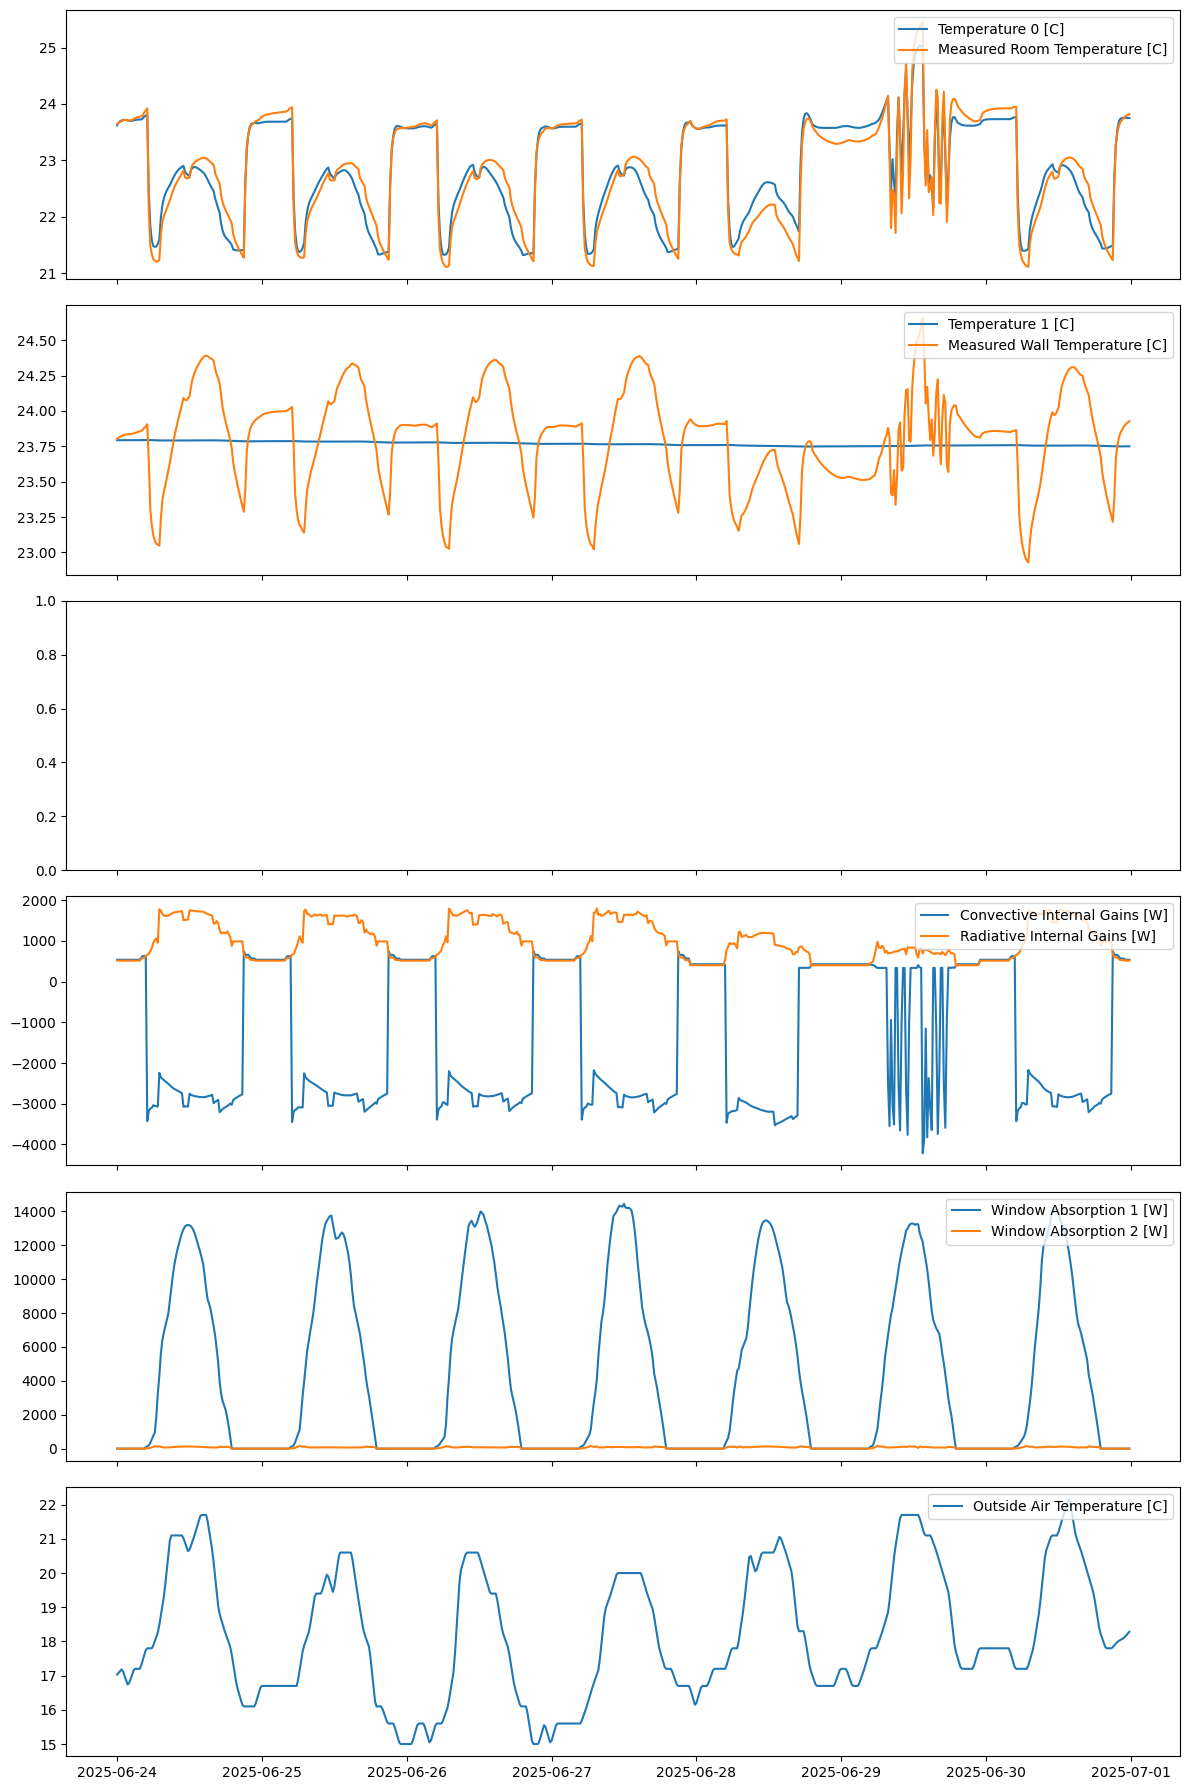

In [5]:
plot_standard1(res['df'])

### Test different RC models

In [6]:
rctypes = {k: v[-1] for k, v in TUNING_MODES.items()}

stats = {}
for rctype, mode in rctypes.items():

    print(f'Tuning type {rctype}...')
    stats[rctype] = []

    # init tuner
    rctuner = RcTuning(rctype=rctype,
                       mode=mode,
                       horizon=5*24*60*60,
                       resample='15min')
    # run tuner
    for runs in range(2):
        stats[rctype].append(rctuner.do_tuning(inputs=inputs))


Tuning type R1C1...
Tuning type R2C2...
Tuning type R4C2...
Tuning type R5C2...


2025-11-07 05:06:40 WARNING  Solver did not report optimality:

- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded.
  Termination condition: maxIterations
  Id: 401
  Error rc: 0
  Time: 439.12786841392517
 (doper.wrapper:do_optimization)
2025-11-07 05:06:40 WARNING  Loading a SolverResults object with a warning status into model.name="unknown";
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded. (pyomo.core:load_from)


Tuning type R5C3...
Tuning type R6C3...
Tuning type R7C4...


2025-11-07 05:13:31 WARNING  Solver did not report optimality:

- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded.
  Termination condition: maxIterations
  Id: 401
  Error rc: 0
  Time: 305.18044543266296
 (doper.wrapper:do_optimization)
2025-11-07 05:13:31 WARNING  Loading a SolverResults object with a warning status into model.name="unknown";
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded. (pyomo.core:load_from)
2025-11-07 05:23:22 WARNING  Solver did not report optimality:

- Status: warning
  Message: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded.
  Termination condition: maxIterations
  Id: 401
  Error rc: 0
  Time: 550.4717524051666
 (doper.wrapper:do_optimization)
2025-11-07 05:23:22 WARNING  Loading a SolverResults object with a warning status into model.name="unknown";
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.8\x3a Maximum CPU Time Exceeded. (pyomo.core:load_fro

In [15]:
stats['R5C2']

[{'optimal': False,
  'duration': 441.1757388114929,
  'objective': None,
  'new_param': {'Rw2i': 1e-07,
   'Ci': 1000006.65573955,
   'Riw': 0.00010962210950509443,
   'Cw': 100000003.2651823,
   'Row1': 0.0023129399595427213,
   'Rw1w2': 0.00475862742737138,
   'Roi': 0.1527986131003115},
  'df': Empty DataFrame
  Columns: []
  Index: [],
  'res_lhs':            Rw2i            Ci      Riw            Cw      Row1     Rw1w2  \
  0  1.000000e-07  1.000007e+06  0.00011  1.000000e+08  0.002313  0.004759   
  
          Roi    duration objective    termination  
  0  0.152799  441.175739      None  maxIterations  },
 {'optimal': True,
  'duration': 4.630234718322754,
  'objective': 3.2183967501096498,
  'new_param': {'Rw2i': 0.01,
   'Ci': 10000000.0,
   'Riw': 0.0001,
   'Cw': 2586285450.2578244,
   'Row1': 0.01,
   'Rw1w2': 0.010799310154594219,
   'Roi': 99.99068465214276},
  'df':                      Error Room Temperature [C] Error Slab Temperature [C]  \
  timestep                 

Model R7C4 not optimal.


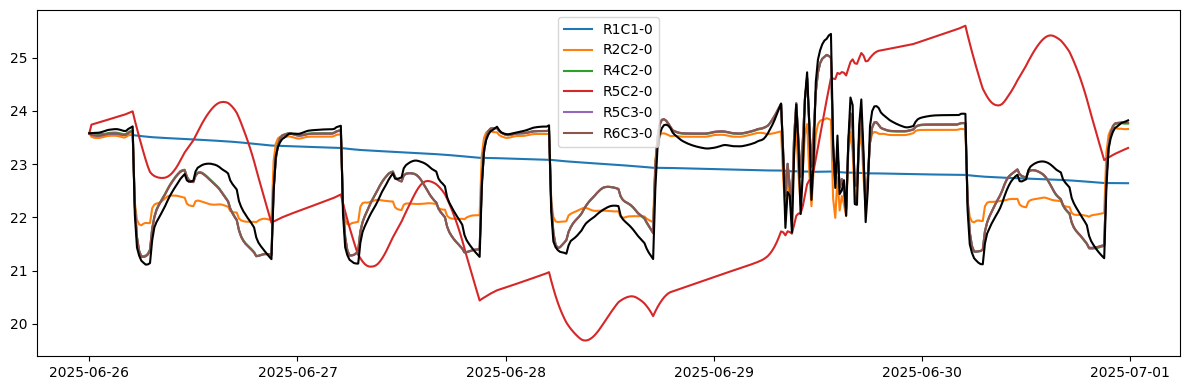

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
durations = {}
objectives = {}
for rctype, mode in rctypes.items():
    for si, stat in enumerate(stats[rctype][1:]):
        label = f'{rctype}-{si}'
        durations[label] = stat['duration']
        objectives[label] = stat['objective']
        if stat['optimal']:
            axs.plot(stat['df']['Temperature 0 [C]'], label=label)
        else:
            print(f'Model {rctype} not optimal.')
axs.legend()
axs.plot(stats['R1C1'][0]['df']['Measured Room Temperature [C]'], color='black')
plt.tight_layout()
plt.show()

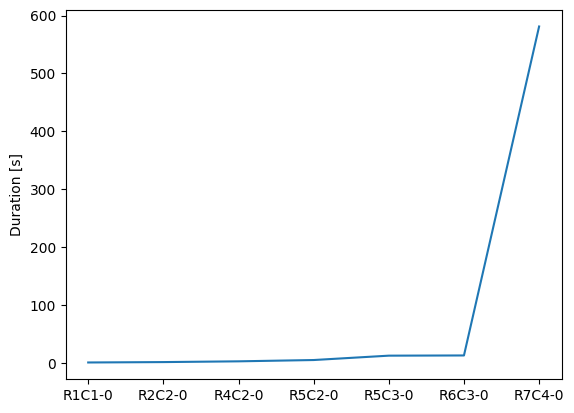

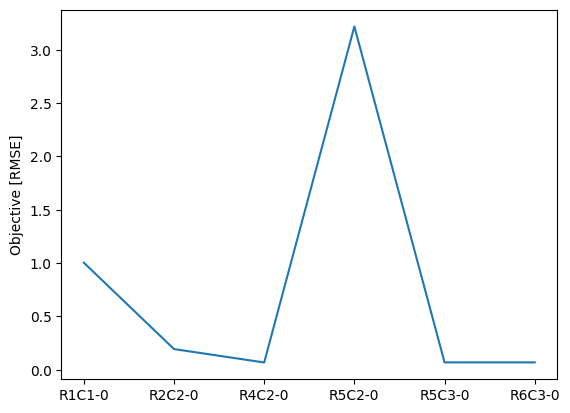

In [17]:
pd.Series(durations).plot()
plt.ylabel('Duration [s]')
plt.show()

pd.Series(objectives).plot()
plt.ylabel('Objective [RMSE]')
plt.show()